In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils import detect_black_scale_bar

In [3]:
# Load the image
image_path = "./resized_images/anic32-900190-1_p_1.jpg"
detect_black_scale_bar(image_path)

In [4]:
from PIL import Image
import os

def resize_image(img_path, img_name): 
    # Open the image
    img = Image.open(img_path)
    # Resize the image
    image_dim = 640
    resized_img = img.resize((image_dim, image_dim), Image.Resampling.LANCZOS)
    # Save the resized image
    resized_img_path = os.path.join('./resized_images', img_name)
    resized_img.save(resized_img_path)
    return resized_img_path

In [5]:
images_folder = "C:/Users/elyes/Documents/UNIL ants/EPFL/original/"

In [6]:
print(resize_image(images_folder + "anic32-900190-1_p_1.jpg", img_name="anic32-900190-1_p_1.jpg"))

./resized_images\anic32-900190-1_p_1.jpg


In [7]:
import pandas as pd


def process_images_from_csv(input_csv, output_csv, images_folder):
    """
    Reads a CSV file with image paths, detects scale bar positions, and saves results to a new CSV file.
    
    Parameters:
        input_csv (str): Path to the input CSV file containing image paths.
        output_csv (str): Path to save the updated CSV with scale bar positions.
        images_folder (str): Path to the images
    """
    # Load the CSV
    df = pd.read_csv(input_csv)
    
    # Ensure the CSV has an 'image_path' column
    if 'ant' not in df.columns:
        raise ValueError("CSV must contain an 'ant' column to find the images.")
    
    # Add new columns for scale bar positions
    df['x1_bar'] = None
    df['y1_bar'] = None
    df['x2_bar'] = None
    df['y2_bar'] = None

    count = 0

    # Process each image
    for idx, row in df.iterrows():
        image_path = images_folder + row['ant']
        image_path = resize_image(image_path, row["ant"])
        result = detect_black_scale_bar(image_path)

        if result:
            start_point, end_point = result
            df.at[idx, 'x1_bar'] = start_point[0]
            df.at[idx, 'y1_bar'] = start_point[1]
            df.at[idx, 'x2_bar'] = end_point[0]
            df.at[idx, 'y2_bar'] = end_point[1]
        else:
            print(f"Scale bar not detected for image: {image_path}")
            count += 1
    
    # Save the updated DataFrame to a new CSV
    df.to_csv(output_csv, index=False)
    print(f"Results saved to {output_csv} \n Number of images with undetected scale bars: {count}")

process_images_from_csv("new_annotations.csv", "annotations.csv", images_folder)

Scale bar not detected for image: ./resized_images\anic32-900190-1_p_1.jpg
Scale bar not detected for image: ./resized_images\antweb1008066_p_1.jpg
Scale bar not detected for image: ./resized_images\antweb1038001_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0005455_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0005691_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0005757_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0059749_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0066723_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0102301_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0102549_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0102572_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0103422_p_1.jpg
Scale bar not detected for image: ./resized_images\casent0103867_p_1.jpg
Scale bar not detected for image: ./resized_image

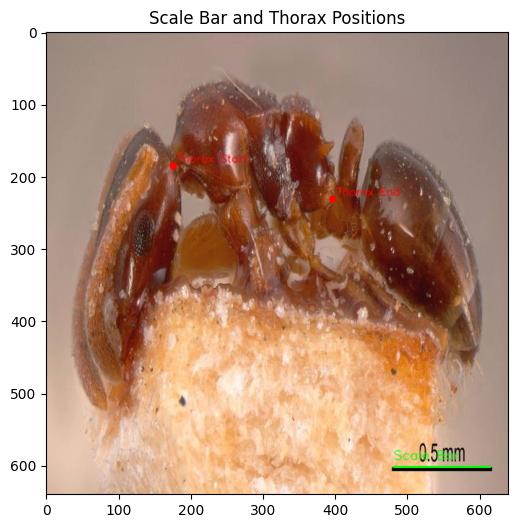

In [20]:
import cv2
import matplotlib.pyplot as plt

def draw_points_and_scale(image_path, scale_bar_points, thorax_points):
    """
    Draws the scale bar and thorax start/end points on the image.

    Parameters:
        image_path (str): Path to the image file.
        scale_bar_points (tuple): Start and end points of the scale bar ((x1, y1), (x2, y2)).
        thorax_points (tuple): Start and end points of the thorax ((x3, y3), (x4, y4)).
        ALL POINTS MUST BE INTEGERS
    """
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw the scale bar
    if scale_bar_points:
        (sx1, sy1), (sx2, sy2) = scale_bar_points
        cv2.line(image_rgb, (sx1, sy1), (sx2, sy2), color=(0, 255, 0), thickness=2)
        cv2.putText(image_rgb, "Scale Bar", (sx1, sy1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (0, 255, 0), 1, cv2.LINE_AA)

    # Draw the thorax start and end positions
    if thorax_points:
        (tx1, ty1), (tx2, ty2) = thorax_points
        cv2.circle(image_rgb, (tx1, ty1), radius=5, color=(255, 0, 0), thickness=-1)
        cv2.putText(image_rgb, "Thorax Start", (tx1 + 5, ty1 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (255, 0, 0), 1, cv2.LINE_AA)

        cv2.circle(image_rgb, (tx2, ty2), radius=5, color=(255, 0, 0), thickness=-1)
        cv2.putText(image_rgb, "Thorax End", (tx2 + 5, ty2 - 5), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (255, 0, 0), 1, cv2.LINE_AA)

    # Display the image
    plt.figure(figsize=(10, 6))
    plt.imshow(image_rgb)
    plt.title("Scale Bar and Thorax Positions")
    plt.axis("on")
    plt.show()

# Define the coordinates (example points)
df = pd.read_csv("annotations.csv").dropna()
row = df.iloc[np.random.randint(0, 1000)]
x1, y1 = row["x1_lmk"], row["y1_lmk"]
x2, y2 = row["x2_lmk"], row["y2_lmk"]
x3, y3 = row["x1_bar"], row["y1_bar"]
x4, y4 = row["x2_bar"], row["y2_bar"]

# Scale bar positions ((start_x, start_y), (end_x, end_y))
scale_bar_points = ((int(x3), int(y3)), (int(x4), int(y4)))  # Detected scale bar coordinates

# Thorax positions ((start_x, start_y), (end_x, end_y)) - Approximate example
thorax_points = ((int(x1), int(y1)), (int(x2), int(y2)))

# Call the function with an image file and points
image_path = "./resized_images/" + row["ant"]  # Replace with your image file path

draw_points_and_scale(image_path, scale_bar_points, thorax_points)